In [6]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from column_report import get_column_report


# connect to SF Open Data API
# extract data in batches to avoid timeouts
# so we'll make a list of the segmented data:
appended_data = []

# pd_calls = pd.DataFrame()
# pd_incidents = pd.DataFrame()

pd_calls = pd.read_csv('Police_Department_Calls_for_Service.csv')
pd_incidents = pd.read_csv('Police_Department_Incidents.csv')

In [7]:
get_column_report(pd_calls)

,Column Name,Data Type,Unique Count,Sample Value,NaNs,% NaN
0,Crime Id,int64,1333995,160923516,0,0.00
1,Original Crime Type Name,object,12814,915 Sleeper,0,0.00
2,Report Date,object,579,04/01/2016,0,0.00
3,Call Date,object,579,04/01/2016,0,0.00
4,Offense Date,object,579,04/01/2016,0,0.00
5,Call Time,object,1440,21:19,0,0.00
6,Call Date Time,object,627527,04/01/2016 09:19:00 PM,0,0.00
7,Disposition,object,29,GOA,0,0.00
8,Address,object,50786,1200 Block Of Pine St,0,0.00
10,State,object,1,CA,0,0.00


In [8]:
get_column_report(pd_incidents)

,Column Name,Data Type,Unique Count,Sample Value,NaNs,% NaN
0,IncidntNum,int64,1684288,150060275,0,0.0
1,Category,object,39,NON-CRIMINAL,0,0.0
2,Descript,object,915,LOST PROPERTY,0,0.0
3,DayOfWeek,object,7,Monday,0,0.0
4,Date,object,5402,01/19/2015,0,0.0
5,Time,object,1439,14:00,0,0.0
7,Resolution,object,17,NONE,0,0.0
8,Address,object,25104,18TH ST / VALENCIA ST,0,0.0
9,X,float64,59336,-122.422,0,0.0
10,Y,float64,57484,37.7617,0,0.0


In [20]:
#merged = pd_calls.merge(pd_incidents, left_on='Crime Id', right_on='IncidntNum', how='right')
print(len(pd_calls))
print(len(pd_incidents))
print(len(merged))

merged[~merged['Crime Id'].isnull()].head(3)

1333995
2133978
2133978


,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address_x,City,...,DayOfWeek,Date,Time,PdDistrict,Resolution,Address_y,X,Y,Location,PdId
0,160923516.0,915 Sleeper,04/01/2016,04/01/2016,04/01/2016,21:19,04/01/2016 09:19:00 PM,GOA,1200 Block Of Pine St,San Francisco,...,Saturday,11/12/2016,22:45,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.783386237938174, -122.40985372994119)",16092351612080
1,160923516.0,915 Sleeper,04/01/2016,04/01/2016,04/01/2016,21:19,04/01/2016 09:19:00 PM,GOA,1200 Block Of Pine St,San Francisco,...,Saturday,11/12/2016,22:45,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.783386237938174, -122.40985372994119)",16092351627130
2,160930038.0,Suspicious Vehicle,04/02/2016,04/02/2016,04/02/2016,00:10,04/02/2016 12:10:00 AM,HAN,Delancey St/brannan St,San Francisco,...,Monday,11/14/2016,17:00,RICHMOND,NONE,100 Block of JORDAN AV,-122.456650,37.782663,"(37.78266336083656, -122.4566503610944)",16093003806241


In [35]:
# incidents_bydistrict = pd_incidents[['PdDistrict', 'IncidntNum']].groupby(['PdDistrict']).count().reset_index() \
#                                                                 .rename(columns={'IncidntNum':'num_incidents'})

incidents_bydistrict.loc[:, 'num_calls'] = pd.Series(merged[['IncidntNum', 'Crime Id', 'PdDistrict']][~merged['Crime Id'].isnull()] \
                                                     .groupby(['PdDistrict']).count().reset_index().IncidntNum)

incidents_bydistrict.loc[:, 'calls_by_incidents'] = 100*incidents_bydistrict.num_calls \
                                                            / incidents_bydistrict.num_incidents
    
incidents_bydistrict

,PdDistrict,num_incidents,num_calls,calls_by_incidents
0,BAYVIEW,213674,2598,1.215871
1,CENTRAL,215727,3004,1.392501
2,INGLESIDE,188050,2235,1.188514
3,MISSION,288544,3866,1.339830
4,NORTHERN,261883,3075,1.174188
5,PARK,121286,1421,1.171611
6,RICHMOND,112300,1594,1.419412
7,SOUTHERN,384746,4493,1.167783
8,TARAVAL,160820,2231,1.387265
9,TENDERLOIN,186947,1777,0.950537


<Container object of 10 artists>

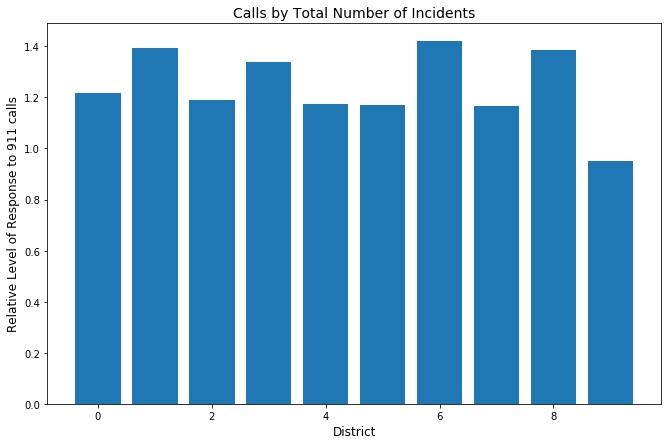

In [42]:
import matplotlib.pyplot as plt

import plotly.plotly as py

%matplotlib inline

fig=plt.figure(figsize=(11, 7), facecolor='w', edgecolor='k')



#plt.xticks(incidents_bydistrict.PdDistrict)
plt.ylabel('Relative Level of Response to 911 calls', size=12)
plt.xlabel('District', size=12)
plt.title('Calls by Total Number of Incidents', size=14)

plt.bar(range(len(incidents_bydistrict.PdDistrict)), incidents_bydistrict.calls_by_incidents)
#plt.xticks(incidents_bydistrict.PdDistrict)

# need to label the districts but I'm running low on time!
# but we can see that in the Tenderloin, for example, crime is reported very infrequently relative to the 
# number of incidents occurring there! and in richmond, on the other hand,

In [3]:


#pdcalls = pd.DataFrame()
%store -r pd_calls

limit = int(5e5)
offset = int(5e5) #already have the first 500k

while (offset < 2.13e6):
    data = pd.read_json("https://data.sfgov.org/resource/fjjd-jecq.json?$limit=%i&$offset=%i&$$app_token=dDufu38pCygTnuS8gpUXA6RmQ" \
                           % (limit, offset))
    pd_calls = pd_calls.append(data)
    print(len(pd_calls))
    offset += 5e5
    %store pd_calls

print(len(pd_calls))
# doing this so we don't ha ve to wait for the first 500K over again
#%store pd_calls

KeyboardInterrupt: 

In [50]:
# from sodapy import Socrata
print(offset)
# client = Socrata("data.sfgov.org", "dDufu38pCygTnuS8gpUXA6RmQ", username="mollyegibson@gmail.com", password="Ifgao!686")

# client.get("/resource/cuks-n6tp.json")
print(len(pd_calls))
print(5e5)

500000.0
500000
500000.0


In [5]:
print('dimensions of the dataset: ', pd_calls.shape)
get_column_report(pd_calls)


dimensions of the dataset:  (1000, 14)


,Column Name,Data Type,Unique Count,Sample Value,NaNs/Zeros,% NaN
0,address,object,824,1500 Block Of Pine St,0,0.0
1,address_type,object,4,Premise Address,0,0.0
2,agency_id,int64,1,1,0,0.0
3,call_date,object,3,2016-09-20T00:00:00.000,0,0.0
4,call_dttm,object,526,2016-09-20T11:50:00.000,0,0.0
5,call_time,datetime64[ns],526,2017-10-28T11:50:00.000000000,0,0.0
8,crime_id,int64,1000,162641608,0,0.0
9,disposition,object,16,REP,0,0.0
10,offense_date,object,3,2016-09-20T00:00:00.000,0,0.0
11,original_crimetype_name,object,173,Complaint Unkn,0,0.0


In [22]:
# using .iloc to drop the first few columns because they're weird and idk what's going on there
pd_incidents = pd.read_json("https://data.sfgov.org/resource/cuks-n6tp.json?$limit=None") #.iloc[:, 8:]
print(pd_incidents.shape)
pd_incidents.head()

HTTPError: HTTP Error 400: Bad Request

In [31]:
# first, checking to see if crime_id is a unique identifier in the pd_calls df
print(len(pd_calls)==len(pd_calls.crime_id.unique()))

pd_calls.dtypes


True


address                            object
address_type                       object
agency_id                           int64
call_date                          object
call_dttm                          object
call_time                  datetime64[ns]
city                               object
common_location                    object
crime_id                            int64
disposition                        object
offense_date                       object
original_crimetype_name            object
report_date                        object
state                              object
dtype: object